In [15]:
#%%
import numpy as np

# Define the corpus

corpus = [ "The king ruled the kingdom with wisdom.", "The queen ruled the kingdom with grace.", "A wise man gave counsel to the king.", "A wise woman gave counsel to the queen.", "The king and the queen hosted a grand ball.", "The man went to the market.", "The woman went to the garden.", "The king and the man discussed politics.", "The queen and the woman discussed art.", "The king and the woman went for a walk.", "The man and the queen had a conversation.", "The wise king made important decisions.", "The wise woman offered valuable advice.", "The king and the man played chess.", "The queen and the woman painted together." ]



# Tokenize the sentences and build a vocabulary
tokens = [sentence.split() for sentence in corpus]
vocabulary = set(word for sentence in tokens for word in sentence)
word_to_index = {word: i for i, word in enumerate(vocabulary)}

# Create one-hot encoded vectors for each word in the vocabulary
vocab_size = len(vocabulary)
one_hot_encodings = np.eye(vocab_size)

# Define the context window size
window_size = 2
training_pairs = []

# Generate training pairs with one-hot encoding
for sentence in tokens:
    sentence_indices = [word_to_index[word] for word in sentence]
    for i, word_index in enumerate(sentence_indices):
        for j in range(max(i - window_size, 0), min(i + window_size + 1, len(sentence_indices))):
            if i != j:
                center_word_vector = one_hot_encodings[word_index]  # One-hot encoded center word vector
                context_word_vector = one_hot_encodings[sentence_indices[j]]  # One-hot encoded context word vector
                training_pairs.append((center_word_vector, context_word_vector))

# Define the Word2Vec model architecture (Skip-gram)
# %%


In [18]:
print(len(training_pairs))

342


In [26]:
# Choose a training pair
training_pair = training_pairs[0]

# The input and output vectors are one-hot encoded, so we find which word they correspond to
input_index = np.argmax(training_pair[0])
output_index = np.argmax(training_pair[1])

# Find the corresponding words from the indices
input_word = [word for word, index in word_to_index.items() if index == input_index][0]
output_word = [word for word, index in word_to_index.items() if index == output_index][0]

print("Input word: ", input_word)
print("Output word: ", output_word)


Input word:  The
Output word:  king


In [27]:
sentence = tokens[0]
context_window_example = []

for i, word in enumerate(sentence):
    # Get the range for context words within the window size
    start = max(i - window_size, 0)
    end = min(i + window_size + 1, len(sentence))
    context_words = [sentence[j] for j in range(start, end) if i != j]
    context_window_example.append((word, context_words))

# Now context_window_example will have tuples of (center_word, [context_words])
for center_word, context_words in context_window_example:
    print("Center word:", center_word)
    print("Context words:", context_words)

Center word: The
Context words: ['king', 'ruled']
Center word: king
Context words: ['The', 'ruled', 'the']
Center word: ruled
Context words: ['The', 'king', 'the', 'kingdom']
Center word: the
Context words: ['king', 'ruled', 'kingdom', 'with']
Center word: kingdom
Context words: ['ruled', 'the', 'with', 'wisdom.']
Center word: with
Context words: ['the', 'kingdom', 'wisdom.']
Center word: wisdom.
Context words: ['kingdom', 'with']


In [ ]:

embedding_size = 5  # Small embedding size for simplicity
W = np.random.rand(vocab_size, embedding_size)  # Input to hidden layer weights (Vocab size x Embedding size)
W_prime = np.random.rand(embedding_size, vocab_size)  # Hidden to output layer weights (Embedding size x Vocab size)

# Training parameters
learning_rate = 0.01
epochs = 1000

In [ ]:


# Training loop
losses = []
for epoch in range(epochs):
    loss = 0
    for center_word_vector, context_word_vector in training_pairs:
        # Forward pass
        h = np.dot(center_word_vector, W)  # Hidden layer output (1 x Embedding size)
        u = np.dot(h, W_prime)  # Score vector (1 x Vocab size)
        y_pred = np.exp(u) / sum(np.exp(u))  # Softmax output (1 x Vocab size)
        # Backward pass
        EI = y_pred - context_word_vector  # Error indicator vector (1 x Vocab size)
        dW_prime = np.outer(h, EI)  # Gradient for W_prime (Embedding size x Vocab size)
        dW = np.outer(center_word_vector, np.dot( W_prime, EI))  # Gradient for W (Vocab size x Embedding size)
        
        # Update weights
        W -= learning_rate * dW
        W_prime -= learning_rate * dW_prime
        
        loss -= np.log(y_pred[np.argmax(context_word_vector)])
    losses.append(loss)


    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')





Text(0.5, 1.0, 'Training Loss')

<Figure size 640x480 with 0 Axes>

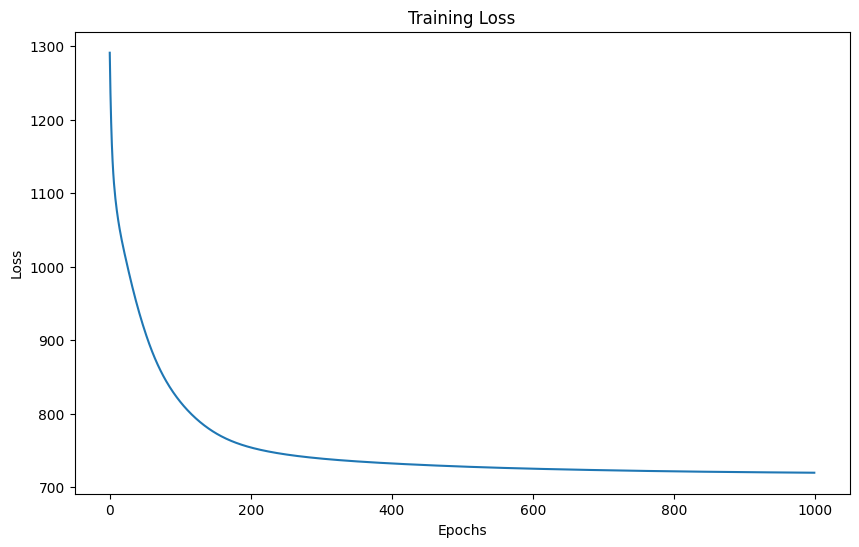

In [6]:

# plot loss
import matplotlib.pyplot as plt
plt.figure()
# figsize
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

In [ ]:
# %%
# Get embeddings for specific words
word_list = ['king', 'man', 'woman', 'queen']
embeddings = []
for word in word_list:
    word_index = word_to_index[word]
    embedding = W[word_index]
    embeddings.append(embedding)
vec_king, vec_man, vec_woman, vec_queen = embeddings
# Compute "king - man + woman"
vec_result = vec_king - vec_man + vec_woman


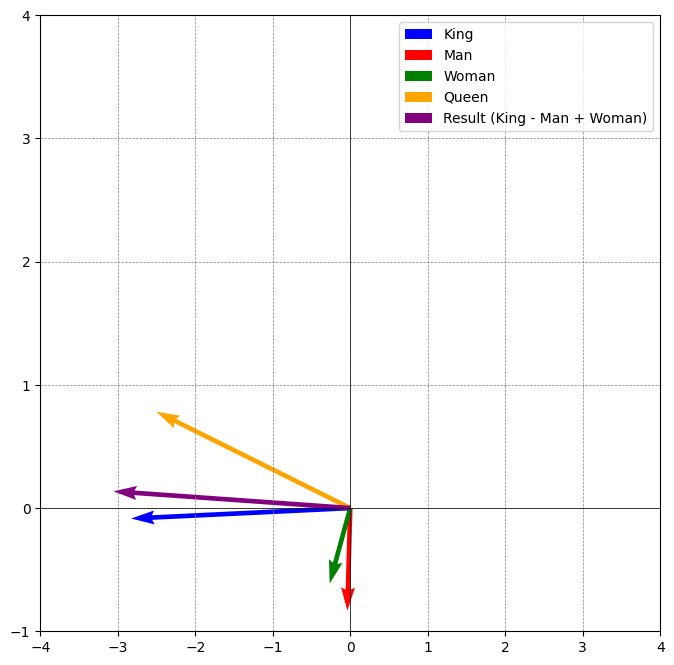

In [3]:
# Get embeddings for specific words
word_list = ['king', 'man', 'woman', 'queen']
embeddings = []
for word in word_list:
    word_index = word_to_index[word]
    embedding = W[word_index]
    embeddings.append(embedding)
vec_king, vec_man, vec_woman, vec_queen = embeddings
# Compute "king - man + woman"
vec_result = vec_king - vec_man + vec_woman

# Plotting
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, vec_king[0], vec_king[1], angles='xy', scale_units='xy', scale=1, color='blue', label='King')
plt.quiver(0, 0, vec_man[0], vec_man[1], angles='xy', scale_units='xy', scale=1, color='red', label='Man')
plt.quiver(0, 0, vec_woman[0], vec_woman[1], angles='xy', scale_units='xy', scale=1, color='green', label='Woman')
plt.quiver(0, 0, vec_queen[0], vec_queen[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Queen')
plt.quiver(0, 0, vec_result[0], vec_result[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Result (King - Man + Woman)')

plt.xlim(-4, 4)
plt.ylim(-1, 4)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()